In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
all_embeddings = np.load('Saved_embeddings_01_11_2023/all_scaled.npy')
chem_embeddings = np.load('Saved_embeddings_01_11_2023/chem_scaled.npy')
social_embeddings = np.load('Saved_embeddings_01_11_2023/social_scaled.npy')
untrained_embeddings = np.load('Saved_embeddings_01_11_2023/untrained_scaled.npy')

all_svd = getSVD(all_embeddings, log = True)
chem_svd = getSVD(chem_embeddings, log = True)
social_svd = getSVD(social_embeddings, log = True)
untrained_svd = getSVD(untrained_embeddings, log = True)


In [5]:
def getSVD(X, s_only = True, log = False):
    # Assuming you have a dataset X with rows as instances and columns as features
    # Compute the mean of each feature
    mean = np.mean(X, axis=0)
    # Center the data
    X_centered = X - mean
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    A = covariance_matrix
    U, s, VT = np.linalg.svd(A)
    if s_only:
        if log == True:
            s = np.log(s)
        return s
    return U, s

In [29]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

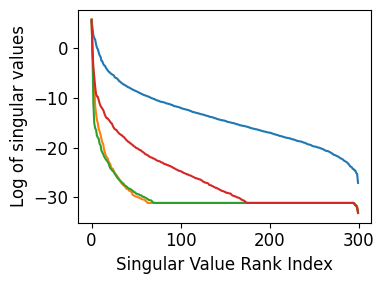

In [48]:
plt.figure(figsize = (4, 3))
plt.plot(all_svd, label = 'All-domain')
plt.plot(chem_svd, label = 'Chem-domain')
plt.plot(social_svd, label = 'Social-domain')
plt.plot(untrained_svd, label = 'Untrained-domain')

plt.xlabel('Singular Value Rank Index')
plt.ylabel('Log of singular values')
plt.tight_layout()
# plt.legend()
plt.savefig('Saved_embeddings_01_11_2023/all_embeddings_SVD.png', dpi = 300)

In [31]:
names = ['ogbg-molpcba',
 'facebook_large',
 'twitch_egos',
 'cora',
 'roads',
 'fruit_fly',
 'trees',
 'random',
 'community']

In [42]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

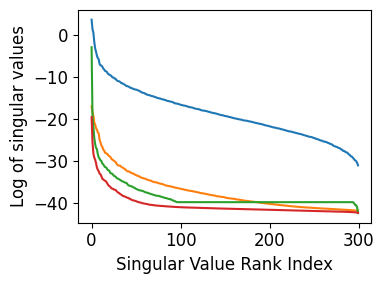

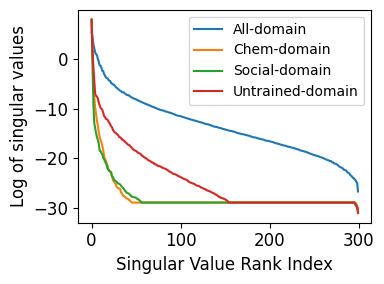

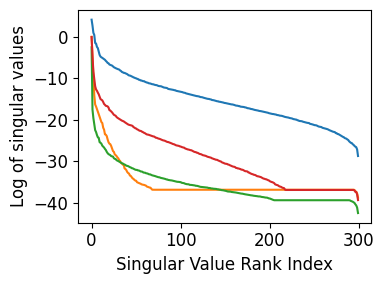

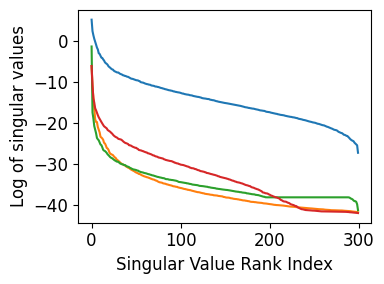

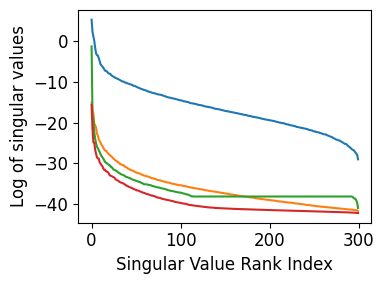

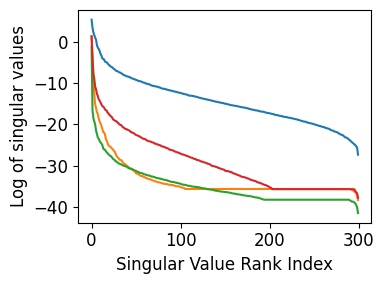

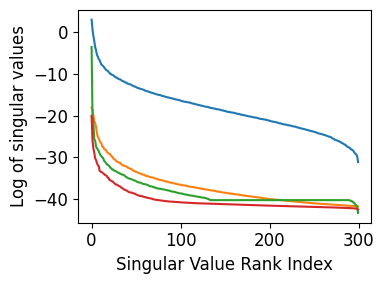

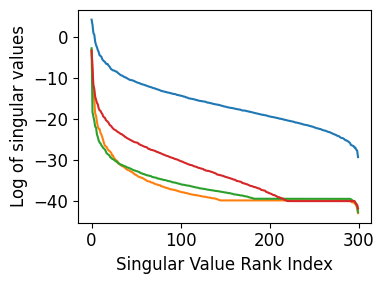

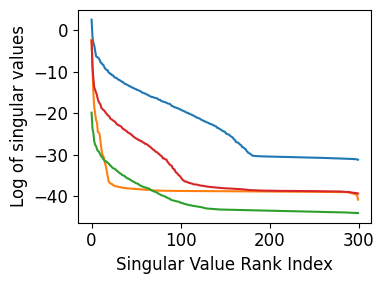

In [49]:
for idx, name in enumerate(names):
    all_embeddings_dom = np.load('Saved_embeddings_01_11_2023/all_scaled_'+name+'.npy')
    chem_embeddings_dom = np.load('Saved_embeddings_01_11_2023/chem_scaled_'+name+'.npy')
    social_embeddings_dom = np.load('Saved_embeddings_01_11_2023/social_scaled_'+name+'.npy')
    untrained_embeddings_dom = np.load('Saved_embeddings_01_11_2023/untrained_scaled_'+name+'.npy')

    all_svd_dom = getSVD(all_embeddings_dom, log = True)
    chem_svd_dom = getSVD(chem_embeddings_dom, log = True)
    social_svd_dom = getSVD(social_embeddings_dom, log = True)
    untrained_svd_dom = getSVD(untrained_embeddings_dom, log = True)
    
    plt.figure(figsize = (4, 3))
    plt.plot(all_svd_dom, label = 'All-domain')
    plt.plot(chem_svd_dom, label = 'Chem-domain')
    plt.plot(social_svd_dom, label = 'Social-domain')
    plt.plot(untrained_svd_dom, label = 'Untrained-domain')
    
#     plt.title(name)
    plt.xlabel('Singular Value Rank Index')
    plt.ylabel('Log of singular values')
    if name == names[1]:
        plt.legend()
    plt.tight_layout()
    plt.savefig('Saved_embeddings_01_11_2023/'+name+'_embeddings_SVD.png', dpi = 300)
    plt.show()
    
    

In [61]:
from numpy import cov

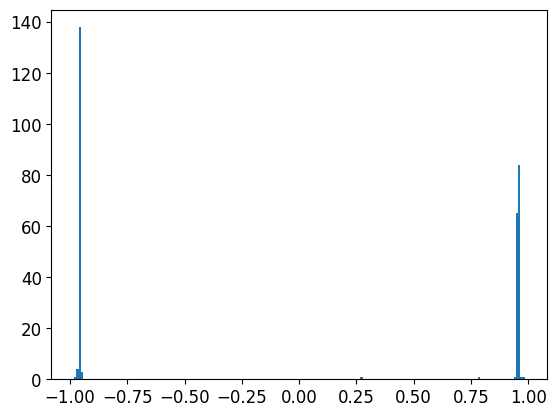

In [71]:


plt.hist([cov(social_embeddings[:, d], chem_embeddings[:, d])[0][1] for d in range(len(chem_embeddings[0]))]
         , bins = 200)
plt.show()

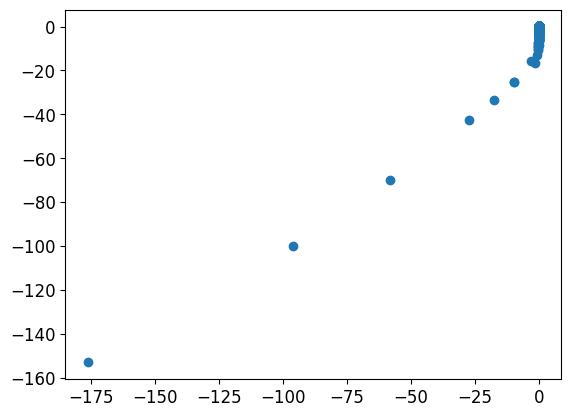

In [60]:
plt.scatter(social_embeddings[:, 0], untrained_embeddings[:, 0])